# Economic Indicators

Let's investigate how some economic indicators are related to crime activity in a region.

## Environment Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set(style='whitegrid', rc={'axes.grid' : False})

In [3]:
# load crime data
crimes_df = pd.read_pickle('data/processed_data.pkl')

## **2015**

In [69]:
eco_2015 = pd.read_csv('data/external/Economic_Indicators_2015.csv', index_col='Community Area')
eco_2015.head()

,Community Area Name,Below Poverty Level,Per Capita Income,Unemployment
Community Area,,,,
1,Rogers Park,22.7,23714,7.5
2,West Ridge,15.1,21375,7.9
3,Uptown,22.7,32355,7.7
4,Lincoln Square,9.5,35503,6.8
5,North Center,7.1,51615,4.5


## House Prices

Let's add House Price data to our investigation.

In [70]:
house_prices = pd.read_csv('data/external/avg_house_prices_per_community.csv', index_col='Month', parse_dates=True)
house_prices_2015 = house_prices['2015']

In [71]:
house_prices_2015.groupby('Community Area').mean()

,Avg Price
Community Area,
1.0,143200.000000
2.0,214954.166667
3.0,225925.000000
4.0,349277.777778
5.0,436229.166667
6.0,340175.000000
7.0,446180.000000
8.0,311938.095238
9.0,315458.333333


In [73]:
eco_2015 = eco_2015.join(house_prices_2015.groupby('Community Area').mean(),
                         on='Community Area')
eco_2015.rename(columns={'Avg Price': 'House Avg Price'}, inplace=True)

In [74]:
crimes_2015 = crimes_df['2015']

In [9]:
crimes_2015.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
eco_indicators = ['Below Poverty Level', 'Per Capita Income', 'Unemployment', 'House Avg Price']

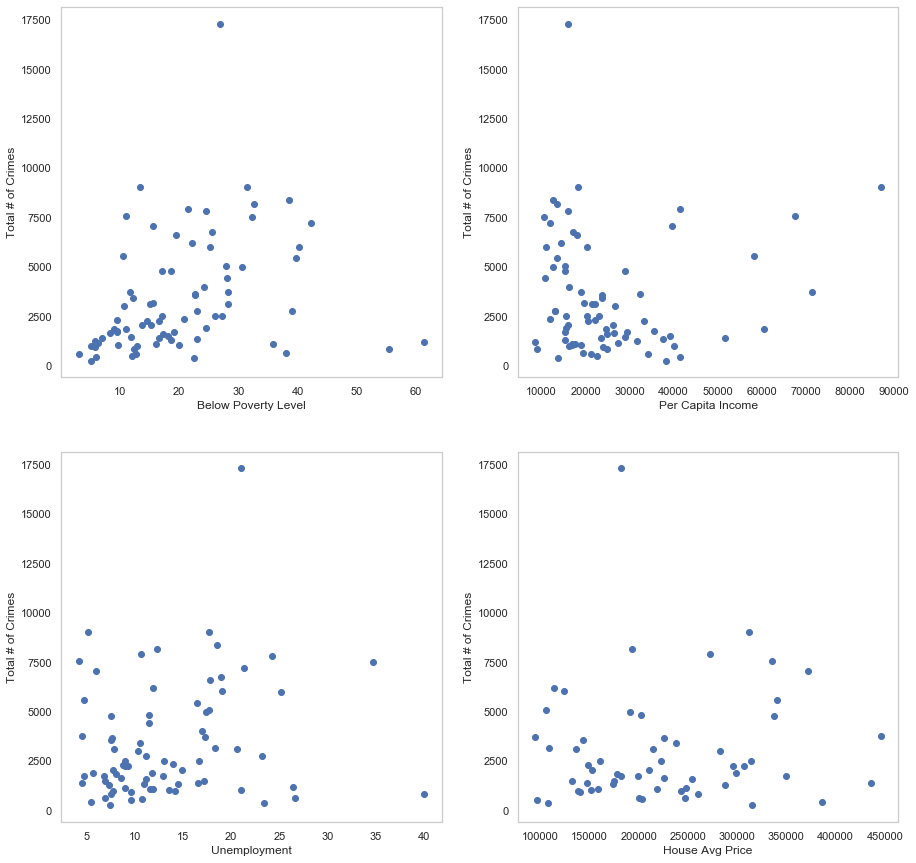

In [75]:
# total number of crimes per region
fig, ax = plt.subplots(2, 2, figsize=(15,15))
for i, indicator in enumerate(eco_indicators):
    ax_ix = (i//2, i%2)
    ax[ax_ix].scatter(x=eco_2015[indicator],
                      y=crimes_2015.groupby('Community Area').size())
    ax[ax_ix].set_xlabel(indicator)
    ax[ax_ix].set_ylabel('Total # of Crimes')

Let's compute **crimes per capita** per region.

**Note:** using most recent population estimates, from the 2010 census.

In [12]:
pop_comm = pd.read_pickle('data/external/Population_by_Community_Area.pkl')

In [76]:
eco_2015 = eco_2015.join(pop_comm)
eco_2015.rename(columns = {'2010': '2010 Population',
                           '2000': '2000 Population'},
               inplace=True)

In [79]:
n_crimes_2015_per_comm = crimes_2015.groupby('Community Area').size()
crime_2015_per_comm = pd.DataFrame(n_crimes_2015_per_comm/eco_2015['2010 Population'],
                                   columns=['Crimes per Capita'])

In [80]:
eco_2015.head()

,Community Area Name,Below Poverty Level,Per Capita Income,Unemployment,House Avg Price,2010 Population,2000 Population
Community Area,,,,,,,
1,Rogers Park,22.7,23714,7.5,143200.000000,54991,63484
2,West Ridge,15.1,21375,7.9,214954.166667,71942,73199
3,Uptown,22.7,32355,7.7,225925.000000,56362,63551
4,Lincoln Square,9.5,35503,6.8,349277.777778,39493,44574
5,North Center,7.1,51615,4.5,436229.166667,31867,31895


### Crimes per Capita per Region

In [81]:
arrest_2015_per_comm = crimes_2015.groupby(['Community Area', 'Arrest']).size()
crime_2015_per_comm['Proportion of Arrests'] = arrest_2015_per_comm.xs(True, level='Arrest')/n_crimes_2015_per_comm

eco_2015 = eco_2015.join(crime_2015_per_comm)

In [82]:
eco_2015.head()

,Community Area Name,Below Poverty Level,Per Capita Income,Unemployment,House Avg Price,2010 Population,2000 Population,Crimes per Capita,Proportion of Arrests
Community Area,,,,,,,,,
1,Rogers Park,22.7,23714,7.5,143200.000000,54991,63484,0.065047,0.254124
2,West Ridge,15.1,21375,7.9,214954.166667,71942,73199,0.043062,0.198192
3,Uptown,22.7,32355,7.7,225925.000000,56362,63551,0.064795,0.267798
4,Lincoln Square,9.5,35503,6.8,349277.777778,39493,44574,0.044742,0.171477
5,North Center,7.1,51615,4.5,436229.166667,31867,31895,0.043650,0.132279


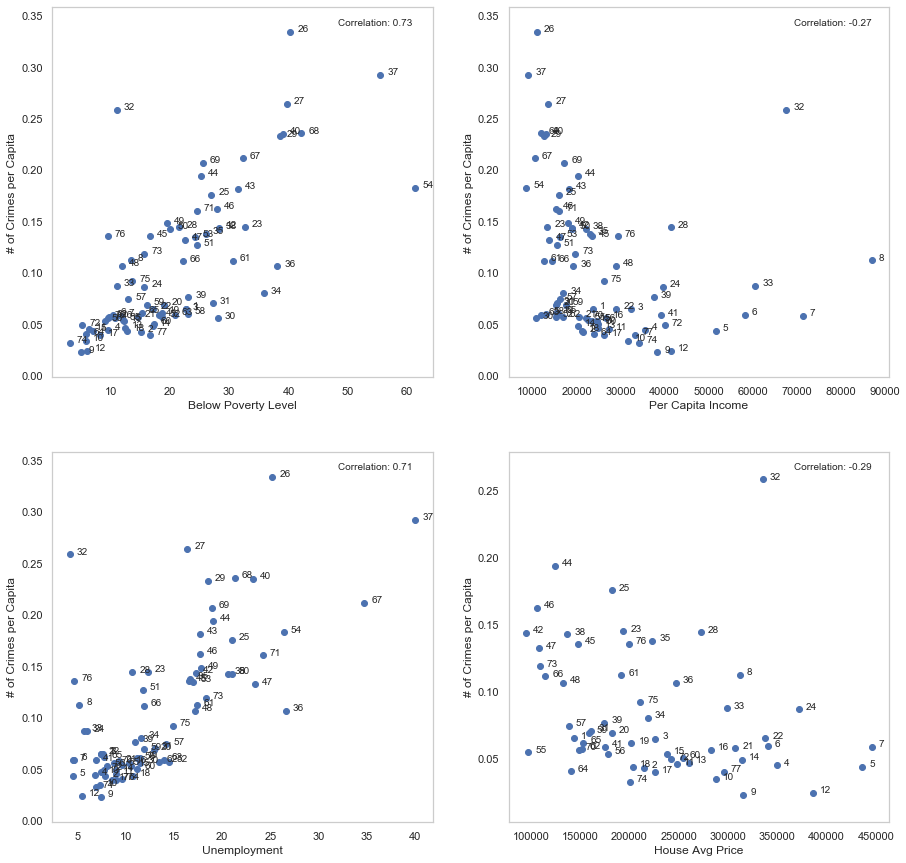

In [83]:
# crimes per capita per region
fig, ax = plt.subplots(2, 2, figsize=(15,15))

for i, indicator in enumerate(eco_indicators):    
    ax_ix = (i//2, i%2)
    x, y = eco_2015[indicator], eco_2015['Crimes per Capita']
    ax[ax_ix].scatter(x, y)
    # color by Proportion of Arrests:
#     ax[ax_ix].scatter(x, y, c=crime_2015_per_comm['Proportion of Arrests'], cmap='Reds')
    ax[ax_ix].set_xlabel(indicator)
    ax[ax_ix].set_ylabel('# of Crimes per Capita')

    # let's also check the numeric correlation
    ax[ax_ix].annotate('Correlation: {}'.format(eco_2015['Crimes per Capita'].corr(eco_2015[indicator]).round(decimals=2)),
                       xy=(.75, .95),
                       xycoords='axes fraction')
    
    # add annotation of Community Area ID
    for i, s in pd.concat([x,y], axis=1).iterrows():
        text = int(i)
        ax[ax_ix].annotate(text,
                           xy = (s[indicator], s['Crimes per Capita']),
                           xytext = (7, 0),
                           textcoords = 'offset points')
        # highlight specified communities
#         comm = [37,26,54]
#         if int(i) in comm:
#             ax[ax_ix].scatter(s[indicator], s['Crimes per Capita'], color='red')

### What's up with Community 32?

From the plots above, it looks like community 32 is a well-off community, but the number of crimes committed in it is quite large. Let's investigate it further.

In [24]:
# what community is it?
eco_2015.loc[32, 'Community Area Name']

'Loop'

From [Wikipedia](https://en.wikipedia.org/wiki/Chicago_Loop):

> The Loop, one of Chicago's 77 designated community areas, is the central business district in the downtown area of the city. It is home to Chicago's commercial core, City Hall, and the seat of Cook County. 

### Crimes per Capita per Region with Arrests

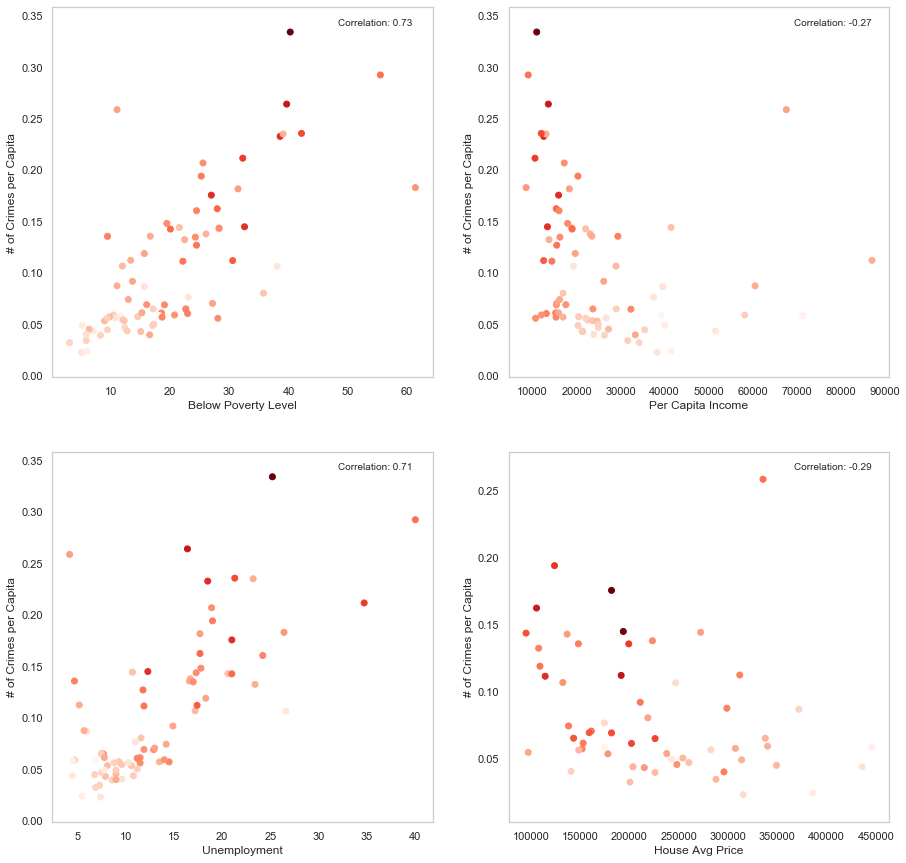

In [84]:
# crimes per capita per region
fig, ax = plt.subplots(2, 2, figsize=(15,15))

for i, indicator in enumerate(eco_indicators):    
    ax_ix = (i//2, i%2)
    x, y = eco_2015[indicator], eco_2015['Crimes per Capita']
    # color by Proportion of Arrests:
    ax[ax_ix].scatter(x, y, c=eco_2015['Proportion of Arrests'], cmap='Reds')
    ax[ax_ix].set_xlabel(indicator)
    ax[ax_ix].set_ylabel('# of Crimes per Capita')

    # let's also check the numeric correlation
    ax[ax_ix].annotate('Correlation: {}'.format(eco_2015['Crimes per Capita'].corr(eco_2015[indicator]).round(decimals=2)),
                       xy=(.75, .95),
                       xycoords='axes fraction')

### Crimes per Capita per Region with Violent Crimes

Now let's color the points by the **proportion of violent crimes** in each community.

In [85]:
# Violent crimes:
# Homicide 1st & 2nd Degree (01A) (Index)
# Criminal Sexual Assault (02) (Index)
# Robbery (03) (Index)
# Aggravated Assault (04A) (Index)
# Aggravated Battery (04B) (Index)

violent_crimes_IUCR = [
    '0110','0130','0261','0262','0263','0264','0265',
    '0266','0271','0272','0273','0274','0275','0281',
    '0291','1753','1754','0312','0313','031A','031B',
    '0320','0325','0326','0330','0331','0334','0337',
    '033A','033B','0340','051A','051B','0520','0530',
    '0550','0551','0552','0553','0555','0556','0557',
    '0558','041A','041B','0420','0430','0450','0451',
    '0452','0453','0461','0462','0479','0480','0481',
    '0482','0483','0485','0488','0489','0490','0491',
    '0492','0493','0495','0496','0497','0498','0510'
]

In [86]:
eco_2015['Proportion of Violent Crimes'] = crimes_2015[crimes_2015['IUCR'].isin(violent_crimes_IUCR)].groupby('Community Area').size()/n_crimes_2015_per_comm

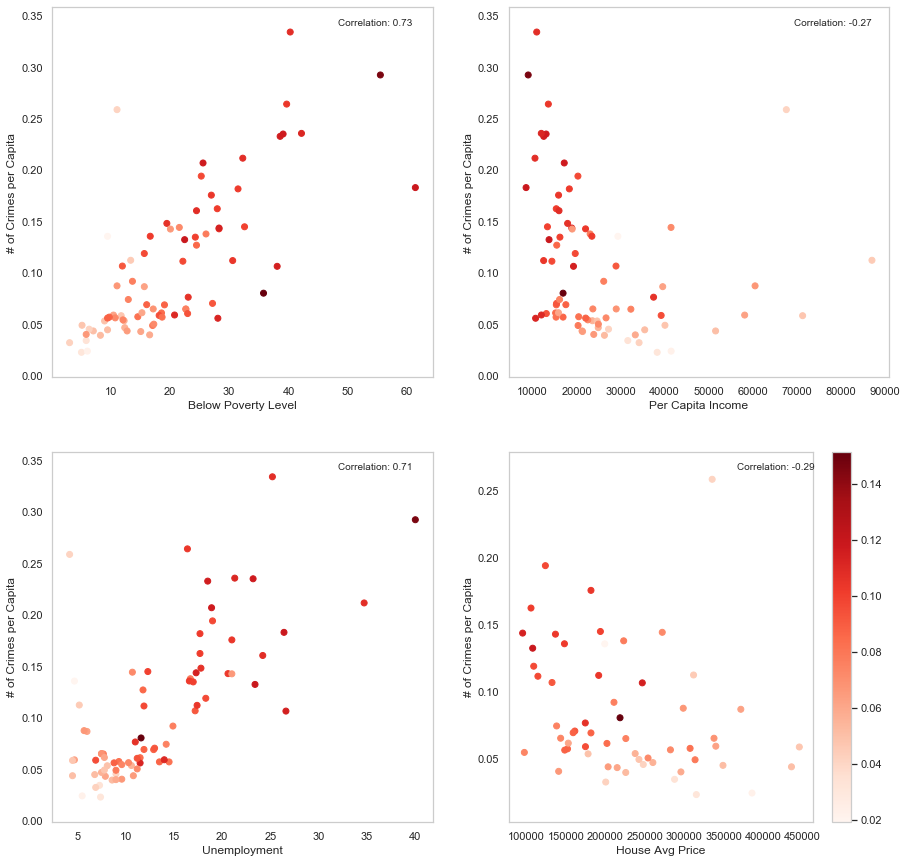

In [87]:
# crimes per capita per region
fig, ax = plt.subplots(2, 2, figsize=(15,15))

for i, indicator in enumerate(eco_indicators):    
    ax_ix = (i//2, i%2)
    x, y = eco_2015[indicator], eco_2015['Crimes per Capita']
    # color by Proportion of Arrests:
    plot = ax[ax_ix].scatter(x, y, c=eco_2015['Proportion of Violent Crimes'], cmap='Reds')
    ax[ax_ix].set_xlabel(indicator)
    ax[ax_ix].set_ylabel('# of Crimes per Capita')

    # let's also check the numeric correlation
    ax[ax_ix].annotate('Correlation: {}'.format(eco_2015['Crimes per Capita'].corr(eco_2015[indicator]).round(decimals=2)),
                       xy=(.75, .95),
                       xycoords='axes fraction')
    
fig.colorbar(plot);
# fig.tight_layout();

In [88]:
# save file with data about Economic Indicators investigation in 2015
eco_2015.to_csv('data/Economic Indicators and Crime 2015.csv')

## **2008–2012**

Now let's investigate the years with data from 2008–2012.

In [25]:
eco_2008 = pd.read_pickle('data/external/Economic_Indicators_2012.pkl')
eco_2008.head()

,Community Area Name,Below Poverty Level,Per Capita Income,Unemployment
Community Area,,,,
1,Rogers Park,23.6,23939,8.7
2,West Ridge,17.2,23040,8.8
3,Uptown,24.0,35787,8.9
4,Lincoln Square,10.9,37524,8.2
5,North Center,7.5,57123,5.2


In [26]:
crimes_2008_2012 = crimes_df['2008':'2012']

In [27]:
crimes_2008_2012.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On', 'Latitude',
       'Longitude'],
      dtype='object')

In [28]:
eco_indicators_2008 = ['Below Poverty Level', 'Per Capita Income', 'Unemployment']

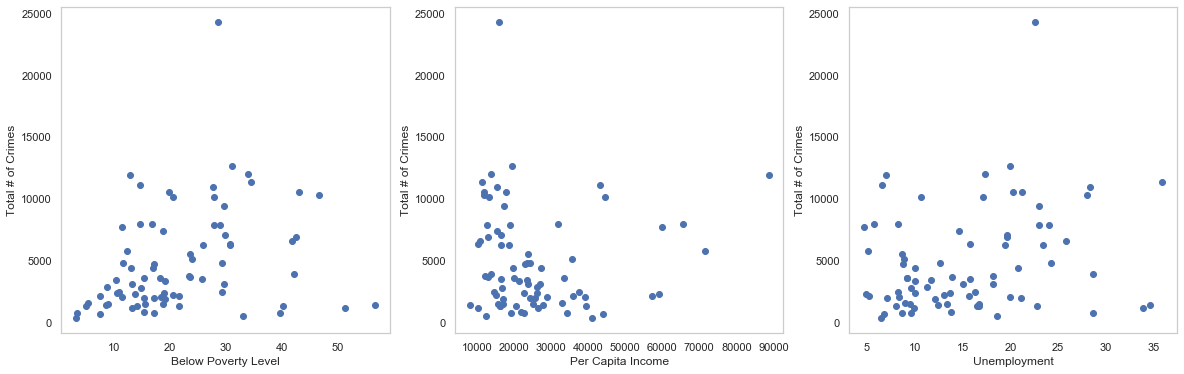

In [32]:
# total number of crimes per region
fig, ax = plt.subplots(1, 3, figsize=(20,6))

avg_crimes_2008_2012 = crimes_2008_2012.groupby(['Community Area', crimes_2008_2012.index.year]).size().groupby('Community Area').mean()

for i, indicator in enumerate(eco_indicators_2008):
#     ax_ix = (i//2, i%2)
    ax[i].scatter(x=eco_2008[indicator],
                  y=avg_crimes_2008_2012)
    ax[i].set_xlabel(indicator)
    ax[i].set_ylabel('Total # of Crimes')

Let's compute **crimes per capita** per region.

**Note:** using population estimates from the 2010 census.

In [33]:
eco_2008 = eco_2008.join(pop_comm)
eco_2008.rename(columns = {'2010': '2010 Population',
                           '2000': '2000 Population'},
               inplace=True)

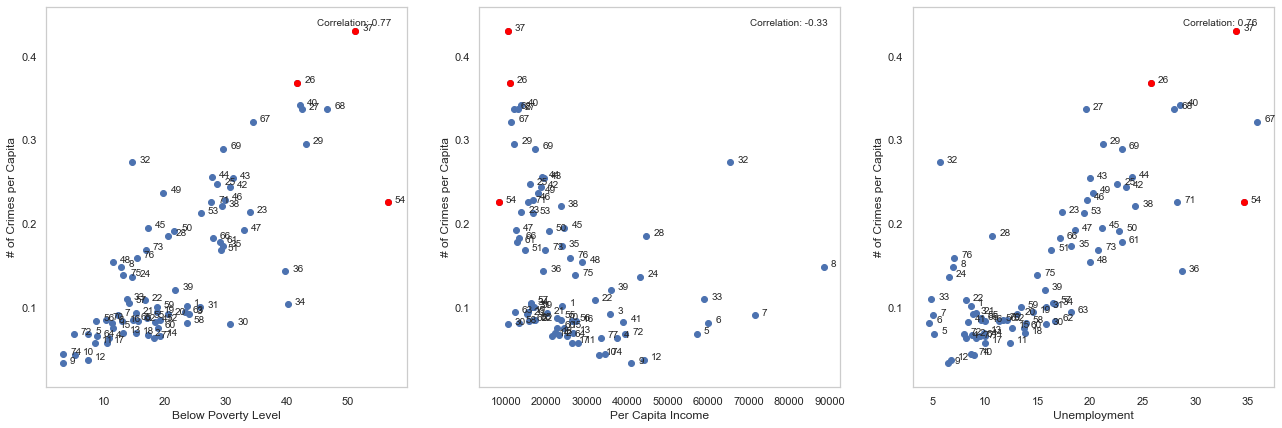

In [35]:
# crimes per capita per region
fig, ax = plt.subplots(1, 3, figsize=(22,7))

crimes_per_capita = avg_crimes_2008_2012/eco_2008['2010 Population']
crimes_per_capita.rename('Crimes per Capita', inplace=True)

for i, indicator in enumerate(eco_indicators_2008):    
#     ax_ix = (i//2, i%2)
    ax_ix = i
    x, y = eco_2008[indicator], crimes_per_capita
    ax[ax_ix].scatter(x, y)
    ax[ax_ix].set_xlabel(indicator)
    ax[ax_ix].set_ylabel('# of Crimes per Capita')
    # let's also check the numeric correlation
    ax[ax_ix].annotate('Correlation: {}'.format(crimes_per_capita.corr(eco_2008[indicator]).round(decimals=2)),
                       xy=(.75, .95),
                       xycoords='axes fraction')
    # add annotation of Community Area ID
    for i, s in pd.concat([x,y], axis=1).iterrows():
        text = int(i)
        ax[ax_ix].annotate(text,
                           xy = (s[indicator], s['Crimes per Capita']),
                           xytext = (7, 0),
                           textcoords = 'offset points')
        # highlight specified communities
        comm = [37,26,54]
        if int(i) in comm:
            ax[ax_ix].scatter(s[indicator], s['Crimes per Capita'], color='red')

### ———————————————————————————————————————

### Save/load data for work in progress

In [37]:
# Save data on disk to resume work later
crimes_df.to_pickle('data/processed_data.pkl')

In [123]:
crimes_df.to_csv('data/processed_data.csv')

In [3]:
crimes_df = pd.read_pickle('data/processed_data.pkl')

### ———————————————————————————————————————